In [90]:
from PIL.Image import open as open_image, fromarray
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

#### The masks we made for this experiment have annoying border issues. So we have to do this fussy image processing to fix things.

In [91]:
cd /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/originals

/home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/originals


In [95]:
##the masks
masks = ['candle_01_mask.tif','grape_juice_02_mask.tif', 'cheeseburger_03_mask.tif',  'peaches_05_mask.tif']
foo = []
for i in masks:
    ##open it
    img = open_image(i).convert('L')
    print img.size
    ##copy it
    newImg = np.array(np.copy(img))
    ##crop off 15 pixels
    shape = img.size
    crop = 3
    img = img.crop((crop, crop, shape[0]-crop, shape[1]-crop))
    ##enlarge back to standard size
    img = np.array(img.resize(shape))
    ##replace edges
    newImg[0:crop] = img[0:crop] ##top
    newImg[-crop:] = img[-crop:] ##bottom
    newImg[:,0:crop] = img[:,0:crop] #left
    newImg[:,-crop:] = img[:,-crop:]
    ##make size of target images (370,600)
    newImg = resize(newImg, (370,600),preserve_range=True, order=0)
    foo += [newImg]


(2504, 1545)
(2502, 1542)
(2500, 1543)
(2501, 1545)


In [97]:
for i,img in enumerate(foo):
    fromarray(np.round(img).astype('uint8')).save('/home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/processed/'+masks[i][:-4]+'.png',format='png')
    

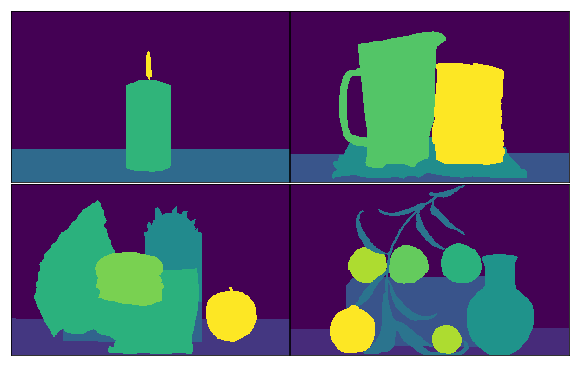

In [96]:
fig = plt.figure(2,(10,10))
grid = ImageGrid(fig, 111, # similar to subplot(111)
                nrows_ncols = (2,2), # creates 2x2 grid of axes
                axes_pad=0.02, # pad between axes in inch.
                )


for gr,img in zip(grid,foo):
    gr.imshow(img)
    gr.set_xticks([])
    gr.set_yticks([])

In [99]:
np.unique(img.astype('uint8'))

array([  0,  28,  59,  87, 117, 145, 173, 199, 227], dtype=uint8)

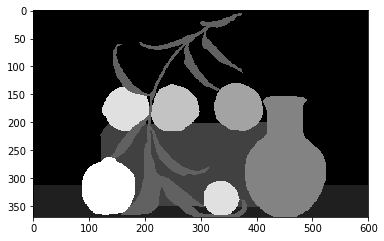

In [100]:
img = img.astype('uint8')
plt.imshow(img,cmap='gray')
    

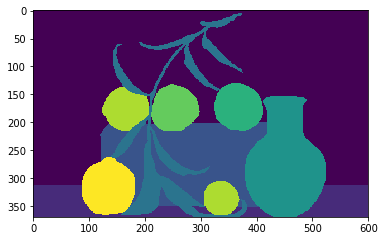

In [101]:
plt.imshow(newImg)

In [102]:
np.unique(newImg)

array([  0.,  28.,  59.,  87., 117., 145., 173., 199., 227.])